# Sprint6

# コーディング
## データセット確認

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

data = pd.read_csv("/home/hiro/ダウンロード/Wholesale customers data.csv")

pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

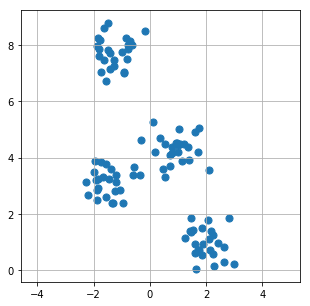

In [2]:
from sklearn.datasets import make_blobs
import seaborn as sns
sns.set

X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize =(5,5))
plt.scatter(X[:,0], X[:,1], marker='o', s=50)
plt.axis('equal')
plt.grid()
plt.show()

## K-meansのスクラッチ

In [3]:
import numpy as np
import random

class scratchKmeans:
    def __init__(self):
        self.__SSE = 0
    
    def Kmeans(self,X, K, max_iteration=10**10000000):
        """
        k-means
        Parameters
        ----------
        max_iteration : int
          最大イテレーション数
        X : 次の形のndarray, shape (n_samples, n_features)
          クラスタ分析対象
        K : int
          クラスタ数
        """
        
        X = np.array(X)
        # ランダムで初期重心点を取得
        centroid = np.array(random.sample(X.tolist(), 1))
        
        # 初期重心点との距離を計算 
        if(K != 1):
            init_CenterNorm = np.linalg.norm((X - centroid), axis=1)[np.newaxis]
            # 距離を降順に並び替え(インデックスを取得)
            index = np.argsort(init_CenterNorm, axis=1)[:,::-1]
            index = index[0, 0: K]
            centroid = np.vstack((centroid, X[index]))
        
        # 前回のラベル情報を初期化
        beforeLabel = np.zeros(len(X))[:,np.newaxis]
        
        # 重心距離を初期化
        X_CenterNorm = np.zeros((len(X), K))
        
        # 最大設定回数まで繰り返す
        for iteration in range(max_iteration):
        #while(True):
            # クラス数分回す
            for i in range(K):
                # 各重心とサンプルとの距離
                X_CenterNorm[:,i] = np.linalg.norm((X - centroid[i][np.newaxis]), axis=1)[np.newaxis]
            # クラスラベルを格納
            label = X_CenterNorm.argmin(1)
    
            # ラベルを比較
            # ラベルが同じだったら抜ける
            if((beforeLabel == label[:,np.newaxis]).all()):
                break
            # ラベルを保存
            beforeLabel = label[:,np.newaxis]
    
            # 重心の更新
            for i in range(K):
                index = np.where(label==i)
                centroid[i] = np.mean(X[index], axis=0)
                # 重心が空の場合、遠い点を重心とする
                if(len(centroid[i]) == 0):
                    # 各重心との距離マトリックスから遠い点を取得
                    index = np.where(X_CenterNorm[:,i] == np.max(X_CenterNorm[:,i]))
                    centroid[i] = X[index]
                    
        self.__SSE = np.min(X_CenterNorm, axis=1).sum()
        return label
    
    def getSSE(self):
        return self.__SSE

## 実行 SSEをグラフとして表示

Text(0, 0.5, 'SSE')

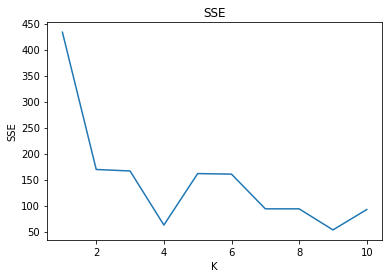

In [4]:
SSE = []
calss = scratchKmeans()
for i in range(1, 11):
    calss.Kmeans(X, i)
    SSE.append(calss.getSSE())

plt.plot(list(range(1, 11)),SSE)
plt.title("SSE")
plt.xlabel("K")
plt.ylabel("SSE")

# Wholesale customers Data SetによるK-means

In [5]:
data = pd.read_csv("/home/hiro/ダウンロード/Wholesale customers data.csv")

pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

Text(0, 0.5, 'SSE')

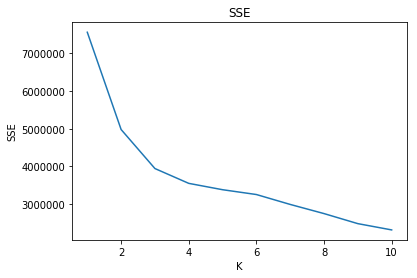

In [6]:
SSE = []
PCA = scratchKmeans()
for i in range(1, 11):
    PCA.Kmeans(data_pca, i)
    SSE.append(PCA.getSSE())

plt.plot(list(range(1, 11)),SSE)
plt.title("SSE")
plt.xlabel("K")
plt.ylabel("SSE")

## データの確認

In [7]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
data.groupby(["Channel", "Region"]).mean()

Fresh          Milk       Grocery       Frozen  \
Channel Region                                                          
1       1       12902.254237   3870.203390   4026.135593  3127.322034   
        2       11650.535714   2304.250000   4395.500000  5745.035714   
        3       13878.052133   3486.981043   3886.734597  3656.900474   
2       1        5200.000000  10784.000000  18471.944444  2584.111111   
        2        7289.789474   9190.789474  16326.315789  1540.578947   
        3        9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen  
Channel Region                                 
1       1             950.525424  1197.152542  
        2             482.714286  1105.892857  
        3             786.682464  1518.284360  
2       1            8225.277778  1871.944444  
        2            8410.263158  1239.000000  
        3            6899.238095  1826.209524

In [9]:
data1 = data.drop(["Channel", "Region"], axis=1)

# PCA
pca = pca.fit(data1)
data_pca = pca.transform(data1)

Text(0, 0.5, 'SSE')

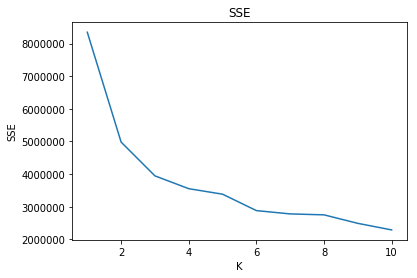

In [10]:
SSE = []
PCA2 = scratchKmeans()
for i in range(1, 11):
    PCA2.Kmeans(data_pca, i)
    SSE.append(PCA2.getSSE())

plt.plot(list(range(1, 11)),SSE)
plt.title("SSE")
plt.xlabel("K")
plt.ylabel("SSE")

上記の結果からk=2が最適であると言える。

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


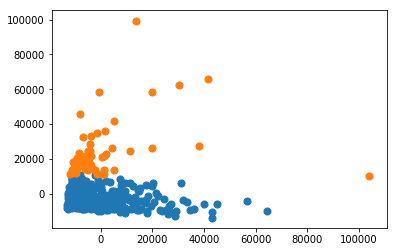

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

# PCA
pca = pca.fit(data1)
data_pca = pca.transform(data1)
label = PCA2.Kmeans(data_pca, 2)

cmap = plt.get_cmap("tab10")
for i in np.unique(label):
    index = np.where(label==i)
    plt.scatter(data_pca[index][:,0], data_pca[index][:,1], marker='o', s=50, c=cmap(i))

上記の結果からPCAしたデータは2クラスに分類することができると判定した。<br>
このクラスはどのデータに相当するかを検証する。

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


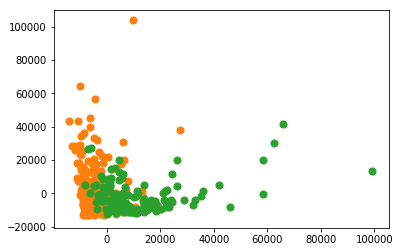

In [12]:
Channel = data["Channel"][:,np.newaxis]

cmap = plt.get_cmap("tab10")
for i in np.unique(Channel):
    index = np.where(Channel==i)[0]
    plt.scatter(data_pca[index][:,1], data_pca[index][:,0], marker='o', s=50, c=cmap(i))

PCAのデータ「Channel」ごとに色分けしたものが上記の図である。図から分かるようにChannelごとにクラスが別れている事がわかる。以上のことから、「Fresh 	Milk 	Grocery 	Frozen 	Detergents_Paper 	Delicassen」の売り上げが法人と個人で異なることがわかる。

# 説明

## クラスタリングとは何か

クラスタリングは、類似するインスタンスをクラスタに分類することである。正解がないので、距離という基準を類似性と考えクラスタリングしていく。つまり、所属するクラスタとは類似度合いが高く、所属していないクラスタとは類似度合いが低い、という基本的な考えがある。<br>
クラスタリングはラベルをもとに行う教師あり学習ではない。なので、データの関係から分類する。なので、使用するフィーチャーが異なったりするだけで結果が大きく変わる。また、返ってくるクラスターから特徴を見つけ、ラベルをつける必要がある。<br>
クラスタリングは様々な機会学習アルゴリズムと合わせて使われることがある。例えば、主成分分析や多次元尺度法などである。主成分分析を行えば情報損失を抑えてクラスタリングできたり、多次元尺度法であれば、数多くのフィーチャーを2次元上に落とし、類似度合いをもとにプロットすることで、インスタンスの類似度合いを分析できる。<br>
また、正解がないデータに、クラスタリングで正解を擬似的に与え、教師あり学習アルゴリズムを行う「半教師あり学習」行うこともある。このように段階を踏むことで、ランダムフォレストなどで、変数重要度の分析が実行できる。<br>
また、マーケティングなどではよく使われる手法である。例えば商品を100品目扱っていお店では、どの顧客がどのような商品を買っているのかなどをクラスタリングすることで、クラスタに対して施作を実行したり、何らかの基準をもとに、都道府県をクラスタリングすることはよくある。

## K-meansとは何か
k-meansはクラスタリングの中でも比較的わかりやすい手法である。<br>
アルゴリズムは以下になる。
1. 分割対象となるクラスタ数kを決める
- データが含まれる空間にランダムにk個の点(セントロイド)を置くき、それぞれのクラスタの中心とする
- 各データがセントロイドのうちどれに最も近いかを計算して、そのデータが所属するクラスタとする
- セントロイドの位置をそのクラスタに含まれるデータの重心になるように移動する
- 各セントロイドの重心が変わらなくなるまで3, 4を繰り返す


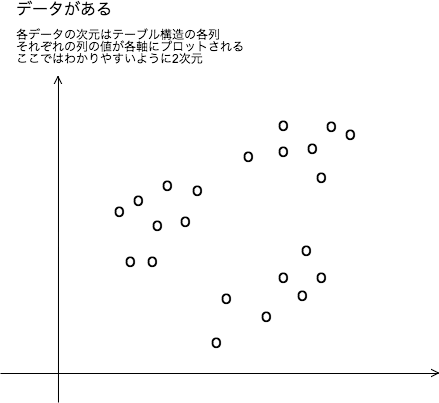

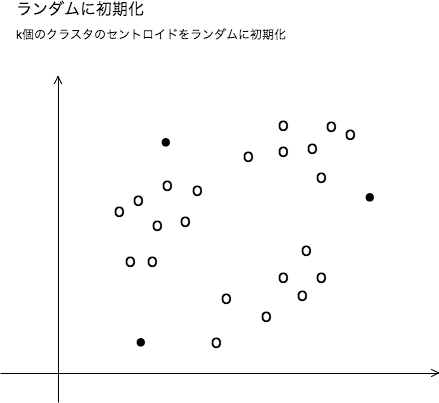

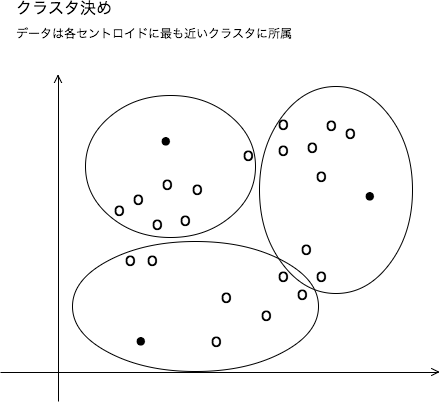

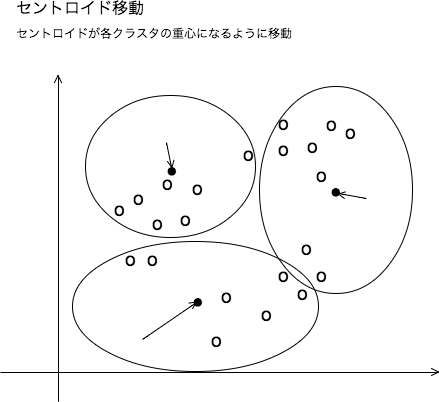

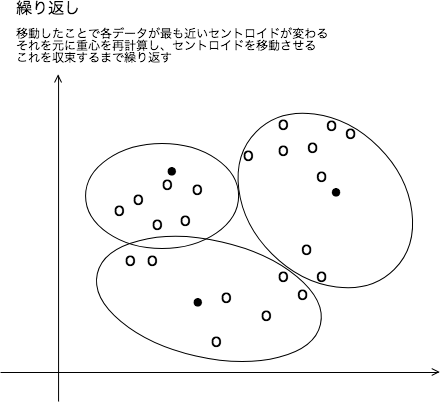

In [58]:
from IPython.display import Image, display_png
# png_file: str
display_png(Image("/home/hiro/デスクトップ/k-means1.png"))
display_png(Image("/home/hiro/デスクトップ/k-means2.png"))
display_png(Image("/home/hiro/デスクトップ/k-means3.png"))
display_png(Image("/home/hiro/デスクトップ/k-means4.png"))
display_png(Image("/home/hiro/デスクトップ/k-means5.png"))

k-meansを扱う上で、１つ注意点がある。 それは、初期値をランダムに決めているのでその値によって結果が変わってしまう可能性があるということである。 そのため、何回か実行してみてその結果の多数決で所属クラスタを決めるなどの工夫が必要になる場合がある。

## クラスタ分析について
クラスター（cluster）とは、英語で「房」「集団」「群れ」のことで、似たものがたくさん集まっている様子を表す。クラスター分析とは、異なる性質のものが混ざり合った集団から、互いに似た性質を持つものを集め、クラスターを作る方法である。対象となるサンプル（人、行）や変数（項目、列）をいくつかのグループに分ける、簡単にいえば「似たもの集めの手法」である。<br>
クラスター分析は、あらかじめ分類の基準が決まっておらず、分類のための外的基準や評価が与えられていない「教師無しの分類法」である。従って、データを単純に男女別や年代別に分けた塊をクラスターとは呼ばない。<br>

## 中心点の初期値についてランダム以外にはどのようなものがあるか
初期のk個のクラスタ中心はなるべく離れている方が良いという考えにもとづいている。まず始めにデータ点をランダムに選び1つ目のクラスタ中心とし、全てのデータ点とその最近傍のクラスタ中心の距離を求め、その距離の二乗に比例した確率でクラスタ中心として選ばれていないデータ点をクラスタ中心としてランダムに選ぶ。 

## クラスタ数の決め方について
クラスタ数を決める方法指標としてエルボー法とシルエット方がある。<br>
### エルボー法

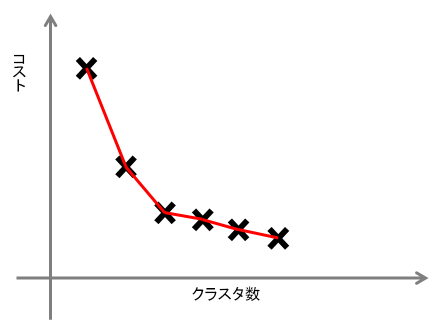

In [81]:
display_png(Image("/home/hiro/デスクトップ/erubo.png"))

クラスタ数Kの増加はコスト関数Jの低下に寄与することが想定される。クラスタ数の増加は、概ね、あるデータのごく近くに重心が現れる確率を上げる。<br>
故に、その下がり幅の効率が最も良い点、つまり、画像中のグラフにおいて傾きが極端に変化している点(=肘の位置)の数のクラスタに分類するのが、最も効率が良いとする考え方である(この場合は左から三つ目)。
しかし、この方法には欠点があります。以下の画像は、「肘」が存在しない場合の例である。

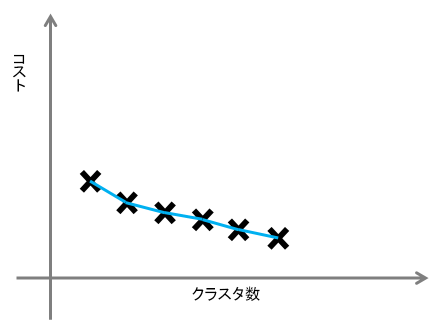

In [82]:
display_png(Image("/home/hiro/デスクトップ/erubo2.png"))

クラスタ数の増加がコストの低下にあまり影響を与えない場合には、このようなグラフになる。<br>
こういった場合には、最も効率の良い点を選択することはできず、エルボー法によって適切なクラスタ数を得るというのは難しい状態であるといえる<br>。
故に、エルボー法はあくまでも指標としてしようするものである。
### シルエット分析

- クラスタ内のサンプルがどの程度密にグループされているか（凝集度）の目安となるグラフを可視化（=パッと見でクラスターが上手くできているかなんとなくわかる）
- １つのクラスターが隣接するクラスターとどれくらい離れているかを可視化する

また、

- 適切なクラスター数がどれくらいかを調べるためにも使える
- シルエット分析はK-measn法以外のクラスタリングアルゴリズムにも適応できる
#### シルエット図の見方


- クラスターの「シルエット係数 silhouette coefficient 」が 1に近いほど、そのクラスターは他のクラスターから遠く離れていることを表す（係数は -1 ~ 1の間をとる）
  - 0に近いほど隣接するクラスターと接近している or 隣接するクラスターと重なっていることを表す（上手くクラスターの分離ができていない状態）
  - 係数がマイナス値だとクラスター化されたサンプルは間違ったクラスターに所属している可能性がある

- シルエットの"厚さ thickness"はクラスターのサイズ（所属するサンプル数）を表す
        適切にクラスター分離できていれば各クラスターのシルエットの"厚さ"は均等に近くなるらしい


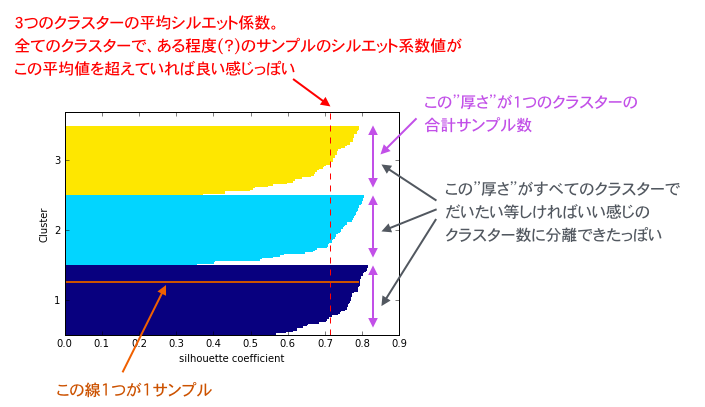

In [83]:
display_png(Image("/home/hiro/デスクトップ/shilet.png"))